![University of Tehran](./img/UT.png)
#   <font color='red'><center>AI CA 1<center></font> 
## <center>Dr. Fadaei<center>
### <center>Daniyal Maroufi<center>
### <center>810098039<center>

# Aim

This assignment aims to solve a problem using Informed and Uninformed search algorithms such as BTS, IDS, and A* algorithm. Finally, we will compare the time complexity of these algorithms.

# Problem Definition

## Intial State

The initial state is the state that our agent will start from. In this case, Gandalf starts from his state at a given position in the input.

## Action

The agent can do an action to reach another state. In this case, Gandolf can have six actions: going up, right, down, and left and picking a friend, and placing them in another position.

## Transition Model

UP action: If it is permitted, the agent will move from state (x,y) to state (x-1,y)

DOWN action: If it is permitted, the agent will move from state (x,y) to state (x+1,y)

RIGHT action: If it is permitted, the agent will move from state (x,y) to state (x,y+1)

LEFT action: If it is permitted, the agent will move from state (x,y) to state (a,y-1)

PICK action: the agent will pick the friend

PLACE action: the agent will place the friend

## Goal State

The goal state is that the agent has successfully done its tasks. In this case, Gandalf must place all the friends in their goal positions and reach the final point (Gandor).

# Algorithms

## BFS

The Breadth-First Search (BFS) is an algorithm for traversing or searching tree or graph data structures. It explores all the nodes at the present depth before moving to the next depth level. BFS is complete, and it will give us an optimal solution with time complexity of $O(b^d)$.

## IDS

The IDS or Iterative Deepening Search is an algorithm based on DFS which controls the depth before expanding another node. IDS leads to an optimal solution. Unlike DFS, its time complexity is $O(bm)$.

## A*

A* algorithm searches for the shortest path between the initial and the final state. It is used in various applications, such as maps.
In maps, the A* algorithm calculates the shortest distance between the source (initial state) and the destination (final state).
$g(n)$ is the cost of reaching the current state, and $h(n)$ is the heuristic function that estimates the cost of getting to the final state from the current node $n$.
A* search is complete, and its time complexity is $O(b^d)$.

## Weighted A*

Weighted A* is just like the A* search but we will multiply the h(n) by an alpha. By choosing different values of alpha we can find the optimized algorithm.

# Code

In [1]:
import queue
from time import time
import copy
from heapq import heappush, heappop, heapify

## Node

In [2]:
class Node(object):
    def __init__(self,position):
        self.state=tuple(position)
        self.parent=None
        self.path=''
        self.picked_RF=None
        self.placed_RFs=set()
        self.inOrk=None
        self.presence=0
        self.depth=0
        self.h=0

    def __eq__(self, other):
        # if self.state==other.state and self.path==other.path and self.picked_RF==other.picked_RF and self.placed_RFs==other.placed_RFs:
        #     return True
        # return False
        return self.h==other.h

    def __lt__(self, other):
         return self.h < other.h

    def __gt__(self, other):
         return self.h > other.h

    def __le__(self, other):
         return self.h <= other.h

    def __ge__(self, other):
         return self.h >= other.h

    def __hash__(self):
        return hash((self.state,str(self.placed_RFs),self.picked_RF,self.depth))
    


## Problem

The code to read the problem from the test file

In [3]:
test_name='test_03'
orks=[]
RFs_initial_pos=[]
RFs_goal_pos=[]
with open('./tests/'+test_name+'.txt') as f:
    n,m = tuple(map(int,f.readline().split()))
    gandalf_initial_pos = tuple(map(int,f.readline().split()))
    gandor = tuple(map(int,f.readline().split()))
    k,l = tuple(map(int,f.readline().split()))
    for _ in range(k):
        x,y,c = tuple(map(int,f.readline().split()))
        orks.append((x,y,c))
    for _ in range(l):
        x,y = tuple(map(int,f.readline().split()))
        RFs_initial_pos.append((x,y))
    for _ in range(l):
        x,y = tuple(map(int,f.readline().split()))
        RFs_goal_pos.append((x,y))
allRFs=dict(zip(RFs_initial_pos,RFs_goal_pos))

orks_map=[[0]*m for _ in range(n)]
for ork,(x,y,c) in enumerate(orks):
    for i in range(-c,c+1):
        for j in range(-c,c+1):
            if abs(i)+abs(j)<=c and x+i>=0 and x+i<n and y+j>=0 and y+j<m:
                    orks_map[x+i][y+j]=ork+1

The Helper functions to check the reaching the goal and check that the transition is valid or not.

In [4]:
def goalTest(pos,pRFs):
    # print('goaltestcalled')
    if pRFs==l and pos==gandor:
        return True
    return False

def canGo(pos,ork,presence):
    x,y=pos
    if x<0 or x>=n or y<0 or y>=m:
        return False
    if k>0:
        if orks_map[x][y]==ork:
            if presence+1>orks[ork-1][2]:
                return False
    return True


The initial node (root) is where the gandalf starts the game. As mentioned above the agent has siz actions that are defined bellow.

In [5]:
root=Node(gandalf_initial_pos)
actions={'pick':'pick','place':'place','R':(0,1),'D':(1,0),'U':(-1,0),'L':(0,-1)}

# BFS

In [6]:
def bfs():
    frontier=queue.Queue()
    explored=set()
    seen_states = 0
    frontier.put(root)
    explored.add(hash(root))
    while not frontier.empty():
        node=frontier.get()
        for action,transition in actions.items():
            if action == 'pick':
                if node.picked_RF is None and node.state in RFs_initial_pos and allRFs[node.state] not in node.placed_RFs:
                    child_with_RF=Node(node.state)
                    child_with_RF.parent=node
                    child_with_RF.path=copy.copy(node.path)
                    child_with_RF.picked_RF=allRFs[node.state]
                    child_with_RF.placed_RFs=copy.copy(node.placed_RFs)
                    child_with_RF.inOrk=node.inOrk
                    child_with_RF.presence=node.presence
                    seen_states+=1
                    child_hash=hash(child_with_RF)
                    frontier.put(child_with_RF)
                    explored.add(child_hash)
                    continue
            elif action == 'place':
                if node.state == node.picked_RF:
                    child=Node(node.state)
                    child.parent=node
                    child.path=copy.copy(node.path)
                    child.picked_RF=None
                    child.placed_RFs=copy.copy(node.placed_RFs)
                    child.placed_RFs.add(node.state)
                    child.inOrk=node.inOrk
                    child.presence=node.presence

                    seen_states+=1
                    child_hash=hash(child)
                    frontier.put(child)
                    explored.add(hash(child))
                    continue

            else:
                if canGo((node.state[0]+transition[0],node.state[1]+transition[1]),node.inOrk,node.presence):
                    child=Node((node.state[0]+transition[0],node.state[1]+transition[1]))
                    child.parent=node
                    child.path=copy.copy(node.path)
                    child.picked_RF=node.picked_RF
                    child.placed_RFs=copy.copy(node.placed_RFs)
                    child.inOrk=node.inOrk
                    child.presence=node.presence

                    map_ork=orks_map[child.state[0]][child.state[1]]
                    alan=map_ork
                    pedar=child.inOrk
                    if alan==pedar and alan>0:
                        child.presence+=1
                    
                    elif not alan==pedar and alan>0 and pedar is None:
                        child.presence=1
                        child.inOrk=map_ork
                    
                    elif pedar is None and alan>0:
                        child.presence=1
                        child.inOrk=map_ork
                    
                    else:
                        child.presence=0
                        child.inOrk=None

                    child.path+=action
                    child_hash=hash(child)
                    if child_hash not in explored:
                        seen_states+=1
                        if goalTest(child.state,len(child.placed_RFs)):
                            return seen_states, child.path
                        frontier.put(child)
                        explored.add(child_hash)

    return 0,''

## Test BFS

Here, we calculate the avrage execution time of BFS method for three times on four different testcases.

In [7]:
for test in range(4):
    times=[]
    test_name='test_0'+str(test)
    print('Results for',test_name)
    for _ in range(3):

        orks=[]
        RFs_initial_pos=[]
        RFs_goal_pos=[]
        with open('./tests/'+test_name+'.txt') as f:
            n,m = tuple(map(int,f.readline().split()))
            gandalf_initial_pos = tuple(map(int,f.readline().split()))
            gandor = tuple(map(int,f.readline().split()))
            k,l = tuple(map(int,f.readline().split()))
            for _ in range(k):
                x,y,c = tuple(map(int,f.readline().split()))
                orks.append((x,y,c))
            for _ in range(l):
                x,y = tuple(map(int,f.readline().split()))
                RFs_initial_pos.append((x,y))
            for _ in range(l):
                x,y = tuple(map(int,f.readline().split()))
                RFs_goal_pos.append((x,y))
        allRFs=dict(zip(RFs_initial_pos,RFs_goal_pos))

        orks_map=[[0]*m for _ in range(n)]
        for ork,(x,y,c) in enumerate(orks):
            for i in range(-c,c+1):
                for j in range(-c,c+1):
                    if abs(i)+abs(j)<=c and x+i>=0 and x+i<n and y+j>=0 and y+j<m:
                            orks_map[x+i][y+j]=ork+1

                            
        root=Node(gandalf_initial_pos)
        
        tic=time()
        a,b=bfs()
        toc=time()
        if len(times)==0:
            print('Seen Sates:',a)
            print('Path:',b)
            print('Path Length:',len(b))
            print('Time:',(toc-tic)*1000)
        times.append((toc-tic)*1000)

    print('\nMean Time:', (times[0]+times[1]+times[2])/3)
    print('------------------')

Results for test_00
Seen Sates: 10478
Path: RRRRRRRRRRRRRRRRRRRRRRRRRRRRRDRUDRUDRUDRUDRRRRRR
Path Length: 48
Time: 272.21012115478516

Mean Time: 224.7589429219564
------------------
Results for test_01
Seen Sates: 1476
Path: RRRRDDDDDDDDLLLRRRUUURURUDLDLDDDLRRRRRUUUUDDDDLLLRRR
Path Length: 52
Time: 23.360729217529297

Mean Time: 23.233334223429363
------------------
Results for test_02
Seen Sates: 413
Path: RRRRRRRDDDDLLLLDLLLRDDRUURURRRDRDD
Path Length: 34
Time: 6.115436553955078

Mean Time: 6.124099095662435
------------------
Results for test_03
Seen Sates: 4504
Path: RRDDDDDDDDLLRDRRRRRRRRUUUUUUUUULLDDDDDLLDDDDLLLLRRRRUUUUURRRRDDDDD
Path Length: 66
Time: 75.50382614135742

Mean Time: 77.66358057657878
------------------


# IDS

For IDS algorithm we use the Depth-limited Search (DLS) algorithm for 100 depth values to find the solution.

In [8]:
def dls(search_depth):
    seen_states=0
    frontier=[]
    explored=set()
    frontier.append(root)
    explored.add(hash(root))

    while len(frontier)>0:
        node=frontier.pop()
        if node.depth+1> search_depth:
            continue

        for action,transition in actions.items():
            if action == 'pick':
                if node.picked_RF is None and node.state in RFs_initial_pos and allRFs[node.state] not in node.placed_RFs:
                    child_with_RF=Node(node.state)
                    child_with_RF.parent=node
                    child_with_RF.path=copy.deepcopy(node.path)
                    child_with_RF.picked_RF=allRFs[node.state]
                    child_with_RF.placed_RFs=copy.copy(node.placed_RFs)
                    child_with_RF.inOrk=node.inOrk
                    child_with_RF.presence=node.presence
                    child_with_RF.depth=node.depth+1
                    seen_states+=1
                    child_hash=hash(child_with_RF)
                    frontier.append(child_with_RF)
                    explored.add(child_hash)
                    continue
            elif action == 'place':
                if node.state == node.picked_RF:
                    child=Node(node.state)
                    child.parent=node
                    child.path=copy.deepcopy(node.path)
                    child.picked_RF=None
                    child.placed_RFs=copy.copy(node.placed_RFs)
                    child.placed_RFs.add(node.state)
                    child.inOrk=node.inOrk
                    child.presence=node.presence
                    child.depth=node.depth+1
                    seen_states+=1
                    child_hash=hash(child)
                    frontier.append(child)
                    explored.add(hash(child))
                    continue
            else:
                if canGo((node.state[0]+transition[0],node.state[1]+transition[1]),node.inOrk,node.presence):
                    child=Node((node.state[0]+transition[0],node.state[1]+transition[1]))
                    child.parent=node
                    child.path=copy.copy(node.path)
                    child.picked_RF=node.picked_RF
                    child.placed_RFs=copy.copy(node.placed_RFs)
                    child.inOrk=node.inOrk
                    child.presence=node.presence
                    child.depth=node.depth+1
                    map_ork=orks_map[child.state[0]][child.state[1]]
                    alan=map_ork
                    pedar=child.inOrk
                    if alan==pedar and alan>0:
                        child.presence+=1
                    elif not alan==pedar and alan>0 and pedar is None:
                        child.presence=1
                        child.inOrk=map_ork
                    elif pedar is None and alan>0:
                        child.presence=1
                        child.inOrk=map_ork
                    else:
                        child.presence=0
                        child.inOrk=None
                    child.path+=action
                    child_hash=hash(child)
                    if child_hash not in explored:
                        seen_states+=1
                        if goalTest(child.state,len(child.placed_RFs)):
                            return seen_states, child.path
                        frontier.append(child)
                        explored.add(child_hash)
    return 0,''

In [9]:
def ids():
    search_depth=0

    while search_depth<100:
        search_depth+=1
        a,b=dls(search_depth)
        if a>0:
            return a,b
    
    return 0,''


## Test IDS

Here, we calculate the avrage execution time of IDS method for three times on four different testcases.

In [10]:
for test in range(4):
    times=[]
    test_name='test_0'+str(test)
    print('Results for',test_name)
    for _ in range(3):

        orks=[]
        RFs_initial_pos=[]
        RFs_goal_pos=[]
        with open('./tests/'+test_name+'.txt') as f:
            n,m = tuple(map(int,f.readline().split()))
            gandalf_initial_pos = tuple(map(int,f.readline().split()))
            gandor = tuple(map(int,f.readline().split()))
            k,l = tuple(map(int,f.readline().split()))
            for _ in range(k):
                x,y,c = tuple(map(int,f.readline().split()))
                orks.append((x,y,c))
            for _ in range(l):
                x,y = tuple(map(int,f.readline().split()))
                RFs_initial_pos.append((x,y))
            for _ in range(l):
                x,y = tuple(map(int,f.readline().split()))
                RFs_goal_pos.append((x,y))
        allRFs=dict(zip(RFs_initial_pos,RFs_goal_pos))

        orks_map=[[0]*m for _ in range(n)]
        for ork,(x,y,c) in enumerate(orks):
            for i in range(-c,c+1):
                for j in range(-c,c+1):
                    if abs(i)+abs(j)<=c and x+i>=0 and x+i<n and y+j>=0 and y+j<m:
                            orks_map[x+i][y+j]=ork+1

        root=Node(gandalf_initial_pos)

        tic=time()
        a,b=ids()
        toc=time()
        if len(times)==0:
            print('Seen Sates:',a)
            print('Path:',b)
            print('Path Length:',len(b))
            print('Time:',(toc-tic)*1000)
        times.append((toc-tic)*1000)

    print('\nMean Time:', (times[0]+times[1]+times[2])/3)
    print('------------------')

Results for test_00
Seen Sates: 58120
Path: RRRRRRRRRRRRRRRRRRRRRRRRRRRRRDURDURDURDURDRRRRRR
Path Length: 48
Time: 6202.441215515137

Mean Time: 5889.42535718282
------------------
Results for test_01
Seen Sates: 19247
Path: DRRDRRLLDDDDDLDURUUUURRRRLLDDDLDDUURUURRRRDDDLDLLRRR
Path Length: 52
Time: 3757.4055194854736

Mean Time: 3928.1328519185386
------------------
Results for test_02
Seen Sates: 3229
Path: RRRRRRRLLLLDDDDLDLLDDRUURURRRDRDDR
Path Length: 34
Time: 437.4985694885254

Mean Time: 411.0894997914632
------------------
Results for test_03
Seen Sates: 70919
Path: DDRDRDDLDLDDDRURUUUUUUUURRRRRRRLLLLLLLDDDDDDDDLDURUUUURRRRRRRDDDDD
Path Length: 66
Time: 19177.157640457153

Mean Time: 19292.707602183025
------------------


# A*

## PriorityQueue

The priority queue is used to explore the closest node to the current state.

In [11]:
class PriorityQueue(object):
    def __init__(self):
        self.list=[]
        heapify(self.list)
    
    def empty(self):
        return len(self.list)==0
    
    def put(self,data):
        heappush(self.list,data)
    
    def get(self):
        return heappop(self.list)



## Heuristic function
The heuristic function estimates the agent's distance to the goal using the manhattan distance.

The distance to the gandor is used for the heuristic function. The number of placed RFs is a positive point for the node. If the agent picked an RF, the heuristic function leads to the distance from the goal of that RF. Otherwise, the heuristic function is the distance to the closest RF.

In [12]:
def heuristic(pos,picked_RF,placed_RFs):
    hn=abs(pos[0]-gandor[0])+abs(pos[1]-gandor[1])

    for RF in placed_RFs:
        hn-=abs(RF[0]-gandor[0])+abs(RF[1]-gandor[1])

    if len(placed_RFs)==l:
        return hn

    if picked_RF is not None:
        return abs(pos[0]-picked_RF[0])+abs(pos[1]-picked_RF[1])

    dists=[]

    for RF_pos, RF_goal in allRFs.items():
        if RF_goal not in placed_RFs and not RF_pos==picked_RF:
            dists.append(abs(pos[0]-RF_pos[0])+abs(pos[1]-RF_pos[1]))

    return min(dists)


In [13]:
root=Node(gandalf_initial_pos)

## A* Algorithm

In [14]:
def a_star():
    frontier=PriorityQueue()
    explored=set()
    seen_states = 0
    root.h=heuristic(gandalf_initial_pos,None,set())
    frontier.put(root)
    explored.add(hash(root))
    while not frontier.empty():
        node=frontier.get()
        for action,transition in actions.items():
            if action == 'pick':
                if node.picked_RF is None and node.state in RFs_initial_pos and allRFs[node.state] not in node.placed_RFs:
                    child=Node(node.state)
                    child.parent=node
                    child.path=copy.copy(node.path)
                    child.picked_RF=allRFs[node.state]
                    child.placed_RFs=copy.copy(node.placed_RFs)
                    child.inOrk=node.inOrk
                    child.presence=node.presence
                    child.h=heuristic(child.state,child.picked_RF,child.placed_RFs)+len(child.path)
                    seen_states+=1
                    child_hash=hash(child)
                    frontier.put(child)
                    explored.add(child_hash)
                    continue
            elif action == 'place':
                if node.state == node.picked_RF:
                    child=Node(node.state)
                    child.parent=node
                    child.path=copy.copy(node.path)
                    child.picked_RF=None
                    child.placed_RFs=copy.copy(node.placed_RFs)
                    child.placed_RFs.add(node.state)
                    child.inOrk=node.inOrk
                    child.presence=node.presence
                    child.h=heuristic(child.state,child.picked_RF,child.placed_RFs)+len(child.path)
                    seen_states+=1
                    child_hash=hash(child)
                    frontier.put(child)
                    explored.add(hash(child))
                    continue
            else:
                if canGo((node.state[0]+transition[0],node.state[1]+transition[1]),node.inOrk,node.presence):
                    child=Node((node.state[0]+transition[0],node.state[1]+transition[1]))
                    child.parent=node
                    child.path=copy.copy(node.path)
                    child.picked_RF=node.picked_RF
                    child.placed_RFs=copy.copy(node.placed_RFs)
                    child.inOrk=node.inOrk
                    child.presence=node.presence
                    child.h=heuristic(child.state,child.picked_RF,child.placed_RFs)+len(child.path)
                    map_ork=orks_map[child.state[0]][child.state[1]]
                    alan=map_ork
                    pedar=child.inOrk
                    if alan==pedar and alan>0:
                        child.presence+=1
                    elif not alan==pedar and alan>0 and pedar is None:
                        child.presence=1
                        child.inOrk=map_ork
                    elif pedar is None and alan>0:
                        child.presence=1
                        child.inOrk=map_ork
                    else:
                        child.presence=0
                        child.inOrk=None
                    child.path+=action
                    child_hash=hash(child)
                    if child_hash not in explored:
                        seen_states+=1
                        if goalTest(child.state,len(child.placed_RFs)):
                            return seen_states, child.path
                        frontier.put(child)
                        explored.add(child_hash)
    return 0,''


## Test A*

In [15]:
for test in range(4):
    times=[]
    test_name='test_0'+str(test)
    print('Results for',test_name)
    for _ in range(3):

        orks=[]
        RFs_initial_pos=[]
        RFs_goal_pos=[]
        with open('./tests/'+test_name+'.txt') as f:
            n,m = tuple(map(int,f.readline().split()))
            gandalf_initial_pos = tuple(map(int,f.readline().split()))
            gandor = tuple(map(int,f.readline().split()))
            k,l = tuple(map(int,f.readline().split()))
            for _ in range(k):
                x,y,c = tuple(map(int,f.readline().split()))
                orks.append((x,y,c))
            for _ in range(l):
                x,y = tuple(map(int,f.readline().split()))
                RFs_initial_pos.append((x,y))
            for _ in range(l):
                x,y = tuple(map(int,f.readline().split()))
                RFs_goal_pos.append((x,y))
        allRFs=dict(zip(RFs_initial_pos,RFs_goal_pos))

        orks_map=[[0]*m for _ in range(n)]
        for ork,(x,y,c) in enumerate(orks):
            for i in range(-c,c+1):
                for j in range(-c,c+1):
                    if abs(i)+abs(j)<=c and x+i>=0 and x+i<n and y+j>=0 and y+j<m:
                            orks_map[x+i][y+j]=ork+1

        root=Node(gandalf_initial_pos)

        tic=time()
        a,b=a_star()
        toc=time()
        if len(times)==0:
            print('Seen Sates:',a)
            print('Path:',b)
            print('Path Length:',len(b))
            print('Time:',(toc-tic)*1000)
        times.append((toc-tic)*1000)

    print('\nMean Time:', (times[0]+times[1]+times[2])/3)
    print('------------------')

Results for test_00
Seen Sates: 2771
Path: RRRRRRRRRRRRRRRRRRRRRRRRRRRRRDRUDRUDRUDRUDRRRRRR
Path Length: 48
Time: 106.8427562713623

Mean Time: 66.2075678507487
------------------
Results for test_01
Seen Sates: 1245
Path: RRRRDDDDDDLDDLLRRRUUURURUDLDLDDDLRRRRRUUUUDDDDLLLRRR
Path Length: 52
Time: 24.37591552734375

Mean Time: 22.516250610351562
------------------
Results for test_02
Seen Sates: 278
Path: RRRRRRRDDDLLDLLDLLLRDDRUURURRDRRDD
Path Length: 34
Time: 3.713369369506836

Mean Time: 3.738562266031901
------------------
Results for test_03
Seen Sates: 3849
Path: RRDDDDDDDDLLRDRRRRUUUURUURRRUUULLDDDDDLLDDDDLLLLRRRRUUUUURRRRDDDDD
Path Length: 66
Time: 67.72208213806152

Mean Time: 71.78274790445964
------------------


# Weighted A*

Simply we change the `A_star` function to use the coeficient `alpha` for the heuristic function.

In [16]:
def wighted_a_star(alpha=1):
    frontier=PriorityQueue()
    explored=set()
    seen_states = 0
    root.h=alpha*heuristic(gandalf_initial_pos,None,set())
    frontier.put(root)
    explored.add(hash(root))
    while not frontier.empty():
        node=frontier.get()
        for action,transition in actions.items():
            if action == 'pick':
                if node.picked_RF is None and node.state in RFs_initial_pos and allRFs[node.state] not in node.placed_RFs:
                    child=Node(node.state)
                    child.parent=node
                    child.path=copy.copy(node.path)
                    child.picked_RF=allRFs[node.state]
                    child.placed_RFs=copy.copy(node.placed_RFs)
                    child.inOrk=node.inOrk
                    child.presence=node.presence
                    child.h=alpha*heuristic(child.state,child.picked_RF,child.placed_RFs)+len(child.path)
                    seen_states+=1
                    child_hash=hash(child)
                    frontier.put(child)
                    explored.add(child_hash)
                    continue
            elif action == 'place':
                if node.state == node.picked_RF:
                    child=Node(node.state)
                    child.parent=node
                    child.path=copy.copy(node.path)
                    child.picked_RF=None
                    child.placed_RFs=copy.copy(node.placed_RFs)
                    child.placed_RFs.add(node.state)
                    child.inOrk=node.inOrk
                    child.presence=node.presence
                    child.h=alpha*heuristic(child.state,child.picked_RF,child.placed_RFs)+len(child.path)
                    seen_states+=1
                    child_hash=hash(child)
                    frontier.put(child)
                    explored.add(hash(child))
                    continue
            else:
                if canGo((node.state[0]+transition[0],node.state[1]+transition[1]),node.inOrk,node.presence):
                    child=Node((node.state[0]+transition[0],node.state[1]+transition[1]))
                    child.parent=node
                    child.path=copy.copy(node.path)
                    child.picked_RF=node.picked_RF
                    child.placed_RFs=copy.copy(node.placed_RFs)
                    child.inOrk=node.inOrk
                    child.presence=node.presence
                    child.h=alpha*heuristic(child.state,child.picked_RF,child.placed_RFs)+len(child.path)
                    map_ork=orks_map[child.state[0]][child.state[1]]
                    alan=map_ork
                    pedar=child.inOrk
                    if alan==pedar and alan>0:
                        child.presence+=1
                    elif not alan==pedar and alan>0 and pedar is None:
                        child.presence=1
                        child.inOrk=map_ork
                    elif pedar is None and alan>0:
                        child.presence=1
                        child.inOrk=map_ork
                    else:
                        child.presence=0
                        child.inOrk=None
                    child.path+=action
                    child_hash=hash(child)
                    if child_hash not in explored:
                        seen_states+=1
                        if goalTest(child.state,len(child.placed_RFs)):
                            return seen_states, child.path
                        frontier.put(child)
                        explored.add(child_hash)
    return 0,''


In [17]:
for test in range(4):
    test_name='test_0'+str(test)
    print('Results for',test_name)
    for alpha in [1.5,2,2.5,3]:
        times=[]
        for _ in range(3):
            orks=[]
            RFs_initial_pos=[]
            RFs_goal_pos=[]
            with open('./tests/'+test_name+'.txt') as f:
                n,m = tuple(map(int,f.readline().split()))
                gandalf_initial_pos = tuple(map(int,f.readline().split()))
                gandor = tuple(map(int,f.readline().split()))
                k,l = tuple(map(int,f.readline().split()))
                for _ in range(k):
                    x,y,c = tuple(map(int,f.readline().split()))
                    orks.append((x,y,c))
                for _ in range(l):
                    x,y = tuple(map(int,f.readline().split()))
                    RFs_initial_pos.append((x,y))
                for _ in range(l):
                    x,y = tuple(map(int,f.readline().split()))
                    RFs_goal_pos.append((x,y))
            allRFs=dict(zip(RFs_initial_pos,RFs_goal_pos))

            orks_map=[[0]*m for _ in range(n)]
            for ork,(x,y,c) in enumerate(orks):
                for i in range(-c,c+1):
                    for j in range(-c,c+1):
                        if abs(i)+abs(j)<=c and x+i>=0 and x+i<n and y+j>=0 and y+j<m:
                                orks_map[x+i][y+j]=ork+1

            root=Node(gandalf_initial_pos)

            tic=time()
            a,b=wighted_a_star(alpha)
            toc=time()
            if len(times)==0:
                print('alpha =',alpha)
                print('Seen Sates:',a)
                print('Path:',b)
                print('Path Length:',len(b))
                print('Time:',(toc-tic)*1000)
            times.append((toc-tic)*1000)

        print('\nMean Time:', (times[0]+times[1]+times[2])/3)
        print('------------------')
    print('------------------')

Results for test_00
alpha = 1.5
Seen Sates: 2398
Path: RRRRRRRRRRRRRRRRRRRRRRRRRRRRRDRUDRUDRUDRUDRRRRRR
Path Length: 48
Time: 102.49948501586914

Mean Time: 65.62503178914388
------------------
alpha = 2
Seen Sates: 2314
Path: RRRRRRRRRRRRRRRRRRRRRRRRRRRRRDRUDRUDRUDRUDRRRRRR
Path Length: 48
Time: 35.89606285095215

Mean Time: 37.32617696126302
------------------
alpha = 2.5
Seen Sates: 2057
Path: RRRRRRRRRRRRRRRRRRRRRRRRRRRRRDRUDRUDRUDRUDRRRRRR
Path Length: 48
Time: 30.17568588256836

Mean Time: 30.20620346069336
------------------
alpha = 3
Seen Sates: 1973
Path: RRRRRRRRRRRRRRRRRRRRRRRRRRRRRDRUDRUDRUDRUDRRRRRR
Path Length: 48
Time: 27.843475341796875

Mean Time: 28.072516123453777
------------------
------------------
Results for test_01
alpha = 1.5
Seen Sates: 1231
Path: RRRRDDDDDDDDLLLRRRUUURURUDLDLDDDLRRRRRUUUUDDDDLLLRRR
Path Length: 52
Time: 24.636507034301758

Mean Time: 22.228399912516277
------------------
alpha = 2
Seen Sates: 1222
Path: RRRRDDDDDDDDLLLRRRUUURURUDLDLDDDLRRRRR

# Comparisons

Algorithms comparison for **test_00**

| Algorithm             | Path Length | Seen States | Mean Execution Time (ms) |
| --------------------- | ----------- | ----------- | ------------------- |
| BFS                   | 48          | 10478       | 224.76              |
| IDS                   | 48          | 58120       | 5889.42             |
| A*                    | 48          | 2771        | 66.21               |
| Weighted A* alpha=1.5 | 48          | 2398        | 65.62               |
| Weighted A* alpha=2   | 48          | 2314        | 37.33               |
| Weighted A* alpha=2.5 | 48          | 2057        | 30.21               |
| Weighted A* alpha=3   | 48          | 1973        | 28.07               |

Algorithms comparison for **test_01**

| Algorithm             | Path Length | Seen States | Mean Execution Time (ms) |
| --------------------- | ----------- | ----------- | ------------------- |
| BFS                   | 52          | 1476        | 23.23               |
| IDS                   | 52          | 19247       | 3928.13             |
| A*                    | 54          | 1245        | 22.52               |
| Weighted A* alpha=1.5 | 54          | 1231        | 22.23               |
| Weighted A* alpha=2   | 54          | 1222        | 20.59               |
| Weighted A* alpha=2.5 | 54          | 1220        | 20.47               |
| Weighted A* alpha=3   | 54          | 1210        | 21.71               |

Algorithms comparison for **test_02**

| Algorithm             | Path Length | Seen States | Mean Execution Time (ms) |
| --------------------- | ----------- | ----------- | ------------------- |
| BFS                   | 34          | 413         | 6.11                |
| IDS                   | 34          | 3229        | 411.09              |
| A*                    | 34          | 278         | 3.71                |
| Weighted A* alpha=1.5 | 34          | 265         | 3.72                |
| Weighted A* alpha=2   | 34          | 271         | 3.68                |
| Weighted A* alpha=2.5 | 34          | 271         | 3.73                |
| Weighted A* alpha=3   | 34          | 273         | 3.78                |

Algorithms comparison for **test_03**

| Algorithm             | Path Length | Seen States | Mean Execution Time (ms) |
| --------------------- | ----------- | ----------- | ------------------- |
| BFS                   | 66          | 4504        | 77.66               |
| IDS                   | 66          | 70919       | 19292.71            |
| A*                    | 66          | 3849        | 71.78               |
| Weighted A* alpha=1.5 | 66          | 3515        | 68.73               |
| Weighted A* alpha=2   | 66          | 3384        | 74.80               |
| Weighted A* alpha=2.5 | 66          | 3276        | 70.47               |
| Weighted A* alpha=3   | 66          | 3328        | 64.72               |


## Executions times

| Algorithm | test_00 | test_01 | test_02 | test_03  |
| --------- | ------- | ------- | ------- | -------- |
| BFS       | 224.76  | 23.23   | 6.11    | 77.66    |
| IDS       | 5889.42 | 3928.13 | 411.09  | 19292.71 |
| A*        | 66.21   | 22.52   | 3.71    | 71.78    |


## Weighted A*

As can be seen in the figures, overall, as we increase the `alpha` the algorithm explores fewer states, and its execution time decreases.

In [18]:
from matplotlib import pyplot as plt

In [32]:
def plot(y,name):
    x=[1,1.5,2,2.5,3]
    plt.plot(x,y)
    plt.xlabel("alpha")
    plt.ylabel("Mean Execution Time (ms)")
    plt.title(name)
    plt.show()

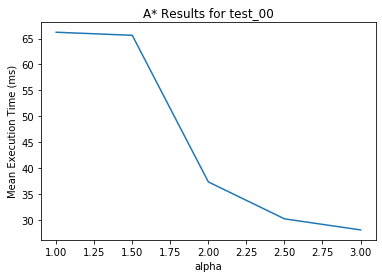

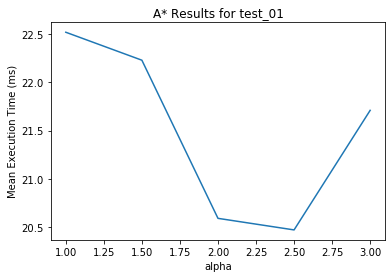

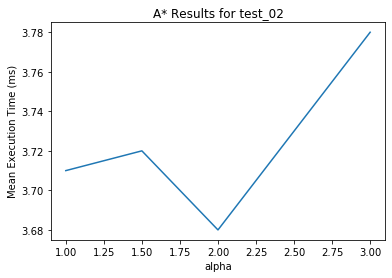

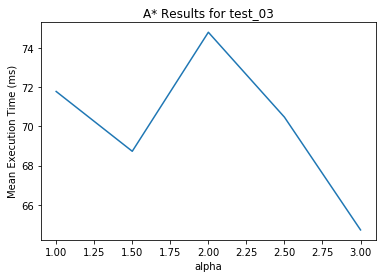

In [33]:
plot([66.21,65.62,37.33,30.21,28.07],'A* Results for test_00')
plot([22.52,22.23,20.59,20.47,21.71],'A* Results for test_01')
plot([3.71,3.72,3.68,3.73,3.78],'A* Results for test_02')
plot([71.78,68.73,74.80,70.47,64.72],'A* Results for test_03')
